In [1]:
import mne
import math
import numpy as np
import neurokit2 as nk
import pandas as pd
import pickle
import random
import os

import matplotlib.pyplot as plt
from scipy.signal import detrend

from scipy.io import loadmat
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from os.path import exists


In [2]:
def load_data(subject):
    if exists('./../../eeg_data/{}.mat'.format(subject)):
        file = './../../eeg_data/{}.mat'.format(subject)
        mat_data = loadmat(file)
        eeg_data = (mat_data['EEG']['data'][0, 0])*1e-6
        channel_names = [ch[0] for ch in mat_data['EEG']['chanlocs'][0, 0]['labels'][0]]
        sampling_freq = mat_data['EEG']['srate'][0, 0][0, 0]
        return eeg_data, channel_names, sampling_freq

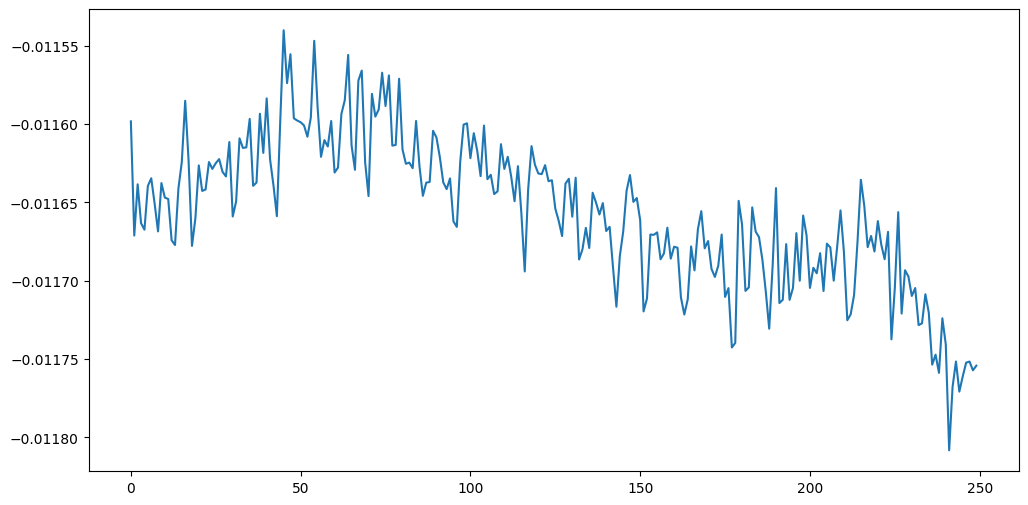

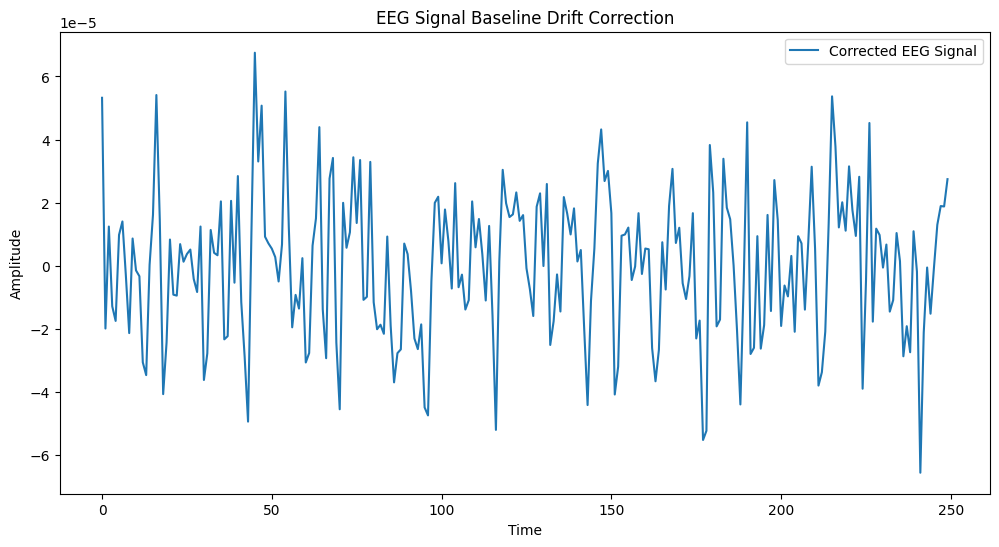

In [3]:
def remove_baseline_drift(eeg_signal, poly_order=6):
    """
    使用多项式拟合去除EEG信号的基线漂移。

    参数：
    eeg_signal (numpy array): 包含EEG信号的数组。
    poly_order (int): 用于拟合基线漂移的多项式的阶数。

    返回：
    numpy array: 去除了基线漂移的EEG信号。
    """
    # 获取EEG信号的时间点
    time = np.arange(len(eeg_signal))

    # 多项式拟合
    coeffs = np.polyfit(time, eeg_signal, poly_order)
    baseline = np.polyval(coeffs, time)

    # 去除基线漂移
    corrected_eeg_signal = eeg_signal - baseline

    return corrected_eeg_signal

eeg_data, channel_names, sampling_freq = load_data(1)
# print(eeg_data.shape, channel_names, sampling_freq)
eeg_data_fp1 = eeg_data[channel_names.index('FP1'), 0:250 ]
corrected_eeg_signal = remove_baseline_drift(eeg_data_fp1)



# 绘制原始信号和校正后的信号
plt.figure(figsize=(12, 6))
plt.plot(eeg_data_fp1, label='Original EEG Signal')
plt.figure(figsize=(12, 6))
plt.plot(corrected_eeg_signal, label='Corrected EEG Signal')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('EEG Signal Baseline Drift Correction')
plt.show()